In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, io, color
from skimage import io

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

## Import data

In [3]:
# Honey bee as 0.0
# Bumble bee as 1.0
#labels= pd.read_csv(open('/content/gdrive/My Drive/Assignment/dataset/labels.csv'))

labels = pd.read_csv('dataset/labels.csv', index_col=0)
labels.head()

,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3969 entries, 520 to 2636
Data columns (total 1 columns):
genus    3969 non-null float64
dtypes: float64(1)
memory usage: 62.0 KB


In [5]:
labels['genus'].value_counts()

1.0    3142
0.0     827
Name: genus, dtype: int64

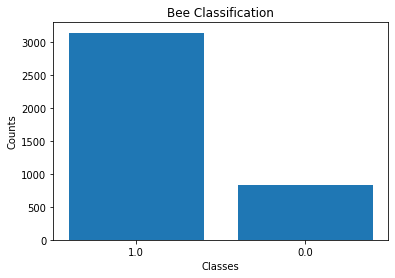

In [6]:
unique_values = labels['genus'].unique()
x_pos = np.arange(len(unique_values))
plt.bar(x_pos, labels['genus'].value_counts())
plt.xticks(x_pos, unique_values)
plt.ylabel('Counts')
plt.xlabel('Classes')
plt.title('Bee Classification')

plt.show()

In [7]:
def get_image(row_id, root='dataset/images/'):
    #print(row_id)
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = io.imread(file_path)
    
    return img

In [8]:
labels.genus.index

Int64Index([ 520, 3800, 3289, 2695, 4922, 1934, 3704, 4017, 3331,  173,
            ...
            3208, 1259, 3573,   49, 2365, 4743, 2787, 3081,  128, 2636],
           dtype='int64', name='id', length=3969)

In [9]:
images = []
for i in labels.genus.index:
    images.append(get_image(i))

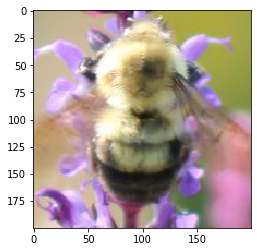

In [10]:
plt.imshow(images[7], cmap='gray')

In [11]:
labels.genus.index

Int64Index([ 520, 3800, 3289, 2695, 4922, 1934, 3704, 4017, 3331,  173,
            ...
            3208, 1259, 3573,   49, 2365, 4743, 2787, 3081,  128, 2636],
           dtype='int64', name='id', length=3969)

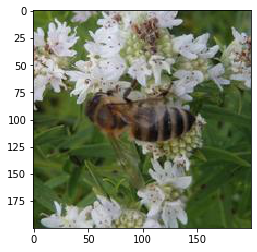

In [12]:
# Visualize Honey Bee
honey_bee_row = labels[labels.genus==0.0].index[5]
honey_bee = get_image(honey_bee_row)
plt.imshow(honey_bee)

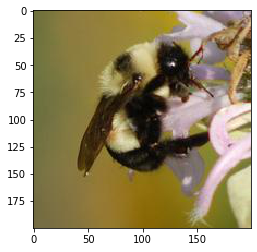

In [13]:
# Visualize Bumblee Bee

bumblee_bee_row = labels[labels.genus==1.0].index[5]
bumblee_bee = get_image(bumblee_bee_row)
plt.imshow(bumblee_bee)

# Extract HOG features

In [14]:
X = []
for img in images:
    img = color.rgb2gray(img)
    fp = feature.hog(img)
    X.append(fp)
    
#for patch in negative_patches:
 #   fn = feature.hog(patch)
  #  X_train.append(fn)
   # y_train.append(0)
    

In [36]:
y = labels['genus']

In [37]:
y[0:5]

id
520     1.0
3800    1.0
3289    1.0
2695    1.0
4922    1.0
Name: genus, dtype: float64

In [38]:
len(X),len(y)

(3969, 3969)

In [ ]:
#import pickle

#pickle.dump(X,open("X.dat", "wb"))
#y

In [40]:
#X = pickle.load(open("X.dat","rb"))

# Train Test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test, y_train, y_test =train_test_split(X, y,stratify=y,test_size=0.25,random_state=27)

## Training a SVM

In [43]:
#from sklearn.svm import LinearSVC
#model = LinearSVC()
#model.fit(X_train, y_train)

In [44]:
#import pickle

#file_name = 'model.pkl'
#pickle.dump(model, open(file_name, 'wb'))

In [45]:
#file_name = 'model.pkl'
#load_model = pickle.load(open(file_name, 'rb'))

In [46]:
from sklearn import metrics
#y_pred = model.predict(X_test)
#print(metrics.classification_report(y_test, y_pred))

# Model, GridSearch and it's Evalution

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score

In [48]:
def grid_search_classifier(classifier_class, train_x,train_y,test_x,test_y,grid_params):
    print(classifier)
    scorer = make_scorer(f1_score, average = 'macro')
    clf = GridSearchCV(classifier_class(random_state=1),
                      grid_params, scoring = scorer)
    
    clf.fit(train_x,train_y)
    print(clf.best_score_, clf.best_params_)
    
    best_model = classifier_class(**clf.best_params_)
    best_model.fit(train_x, train_y)
    y_preds_final = best_model.predict(test_x)
    f1Score= f1_score(test_y,y_preds_final,average='macro')
    return f1Score

In [49]:
classifiers_to_try_out = [
    (RandomForestClassifier,
    {'n_estimators': [5,10,20],'criterion':['gini','entropy'],'max_depth':[3,5,9]}
    ),
    (SVC,
    {'C':[0.1,1,10], 'kernel':['linear','rbf']}
    ),
    (AdaBoostClassifier,
    {'n_estimators': [5,10,20], 'learning_rate':[0.1,0.5,1]}
    )
]

In [ ]:
f1Scores=[]
for classifier, grid in classifiers_to_try_out:
    f1Score = grid_search_classifier(classifier, X_train, y_train,X_test,y_test, grid)
    f1Scores.append({'Classifier': str(classifier),'F1-Score':f1Score})
    
#print(accuracies)
classwisef1Score = pd.DataFrame(f1Scores)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.47951123730307676 {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 5}
<class 'sklearn.svm._classes.SVC'>


In [ ]:
classwisef1Score